# *Insurance Premium Prediction*

## Loading Libraries

In [6]:
import pandas as pd
import numpy as np
# import statsmodels
import warnings
warnings.filterwarnings('ignore')

# import plotly.express as px
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [7]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install xgboost
!pip install statsmodels
!pip install  plotly
!pip install  nbformat>=4
!pip install --upgrade nbformat


In [9]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Print the more information about the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Let us see statistical information about the Numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Let us see more statiscal information of the categorical features 
df.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

NameError: name 'sns' is not defined

In [ ]:
fig = px.histogram(df,
                    x='charges',
                    marginal='box',
                    color='smoker',
                    color_discrete_sequence=['green', 'orange'],
                    title="Annual Medical Expenses")

fig.update_layout(bargap=0.1)
fig.show()                   

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="sex",
                    color_discrete_sequence=["blue", "purple"],
                    title="Annual Medical Expenses by Sex")

fig.update_layout(bargap=0.1)
fig.show()                    

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.histogram(df,
                    x="charges",
                    marginal="box",
                    color="region",
                    color_discrete_sequence=["grey", "orange", "green","violet"],
                    title="Annual Medical Expenses by Region")

fig.update_layout(bargap=0.1)
fig.show()                    

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [ ]:
px.histogram(df, x="smoker", color="sex", title="Smoker")

From the above graph we make some observations.

* It appears that 20% of the customers have reported they smoking.
* We can also see that smoking appears a more common habit among males.

In [ ]:
px.histogram(df, x="region", color="smoker", title="Region")

In [ ]:
px.histogram(df, x="smoker", color="children", title="Smoker Vs Children")

In [ ]:
fig = px.scatter(df,
                x="age",
                y="charges",
                color="smoker",
                opacity=0.8,
                hover_data=["sex"],
                width=800,
                height=500,
                title="Age vs Expenses")

fig.update_traces(marker_size=5)
fig.show()                

### BMI and Expenses

Let's visualize the relationship between BMI (body mass index) and expenses using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [ ]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['sex'],
                opacity=0.8,
                width=800,
                height=500,
                title="BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()                

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical expenses. However, medical expenses seem to be significantly higher for smokers with a BMI greater than 30.


In [ ]:
fig = px.scatter(df,
                x="bmi",
                y="charges",
                color="smoker",
                hover_data=['region'],
                opacity=0.9,
                width=800,
                height=500,
                title= "BMI Vs Expenses")

fig.update_traces(marker_size=5)
fig.show()               

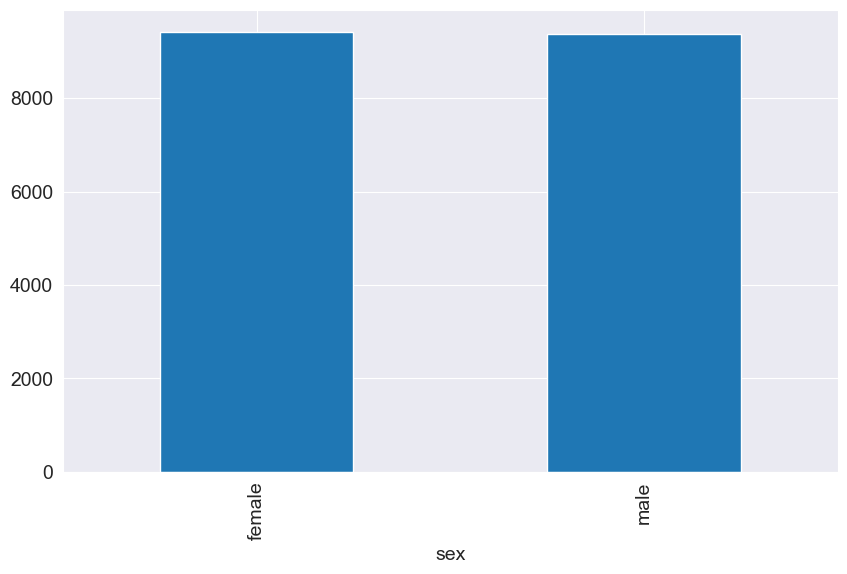

In [ ]:
df.groupby("sex")['charges'].median().plot.bar()
plt.show()

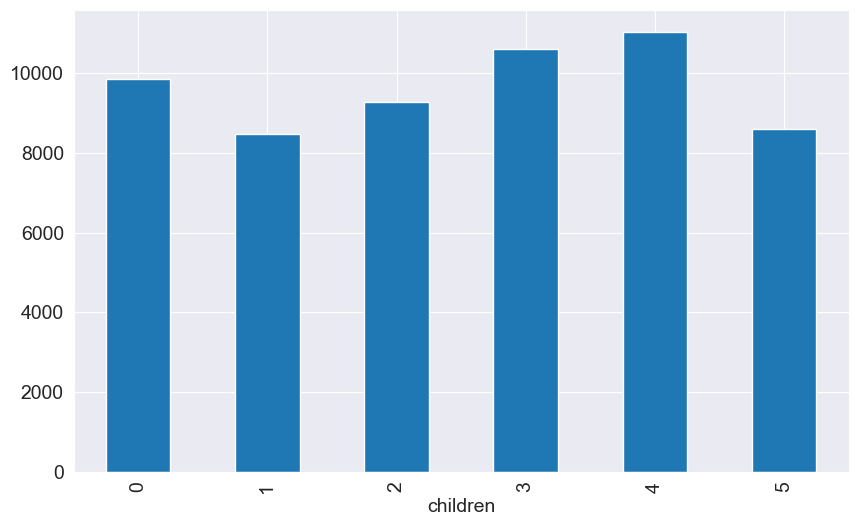

In [ ]:
df.groupby("children")['charges'].median().plot.bar()
plt.show()

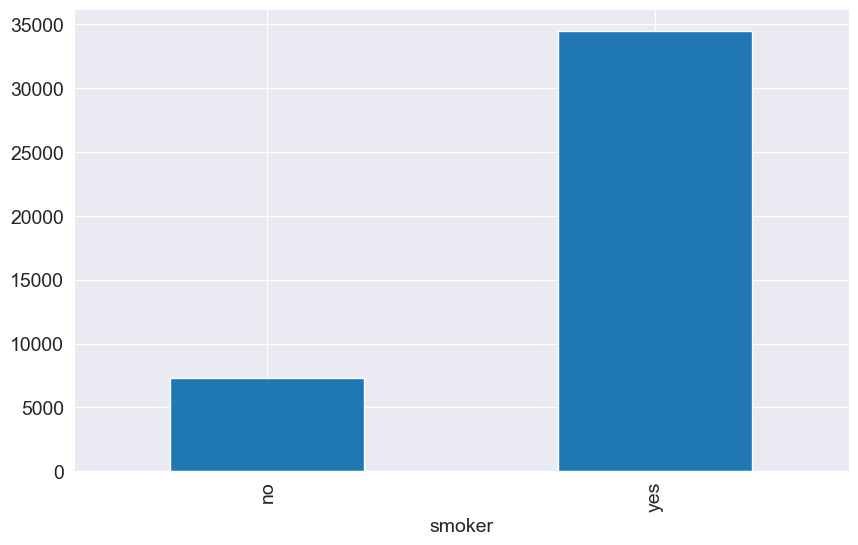

In [ ]:
df.groupby("smoker")['charges'].median().plot.bar()
plt.show()

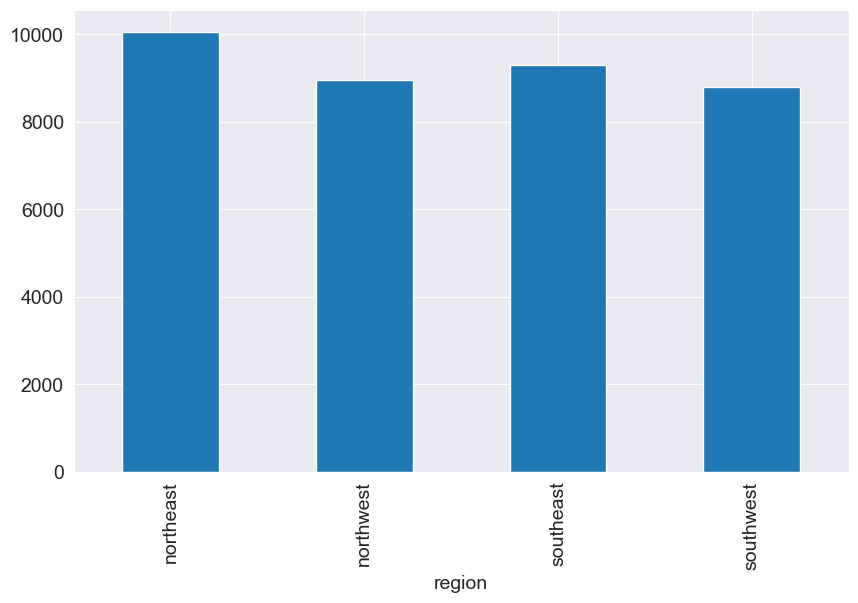

In [ ]:
df.groupby("region")['expenses'].median().plot.bar()
plt.show()

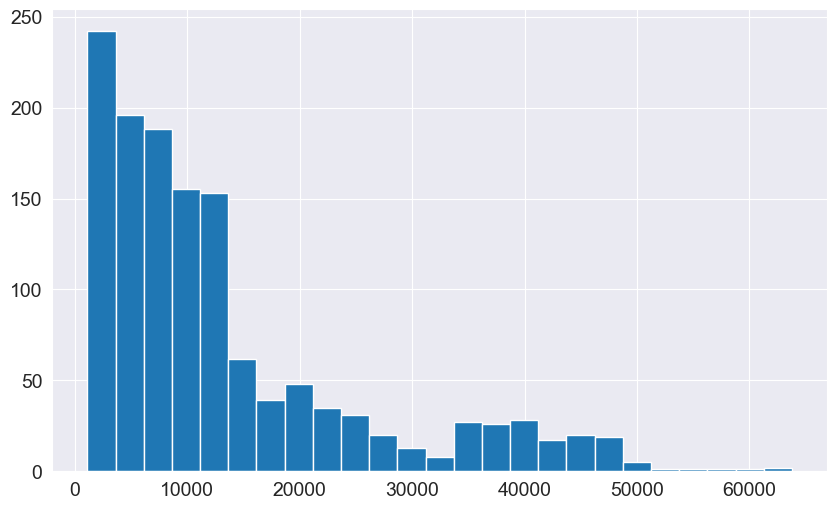

In [ ]:
df['charges'].hist(bins=25)
plt.show()

In [ ]:
fig = px.histogram(data_frame=df, x='bmi', y='charges', width=800, height=500, title='Expenses by BMI')
fig.show()

In [ ]:
fig = px.histogram(df, x="bmi", y="charges", color="sex", marginal="rug", hover_data=df.columns)
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color='sex', facet_col="children")
fig.update_xaxes(matches=None)
fig.show()

In [ ]:
fig = px.pie(data_frame=df, names='sex', values='charges', width=800, height=500, title='Expenses by Gender')
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="sex", width=900, height=500, title="Expenses by BMI & Gender")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="smoker", width=900, height=500, title="Expenses by BMI & Smoker")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="region", width=900, height=500, title="Expenses by BMI & Region")
fig.show()

In [ ]:
fig = px.violin(df, y="charges", x= "sex")
fig.show()

From left plot the insurance charge for male and female is approximatley in same range,it is average around 50k.

In [ ]:
fig = px.violin(df, y="charges", x= "smoker")
fig.show()

 In right plot the health expenses for smokers is much wide range compare to non smokers, the average expenses for non smoker is approximately 5000 bucks. For smoker the minimum health expenses is itself 5000 bucks.

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="sex", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges", color="region", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.box(df, x="children", y="charges", color="smoker", notched=True, title= "Expenses by Children & Smoker")
fig.show()

In [ ]:
df.charges.corr(df.age)

0.2990081933306478

In [ ]:
df.charges.corr(df.bmi)

0.19834096883362887

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [ ]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.expenses.corr(smoker_numeric)

AttributeError: 'DataFrame' object has no attribute 'expenses'

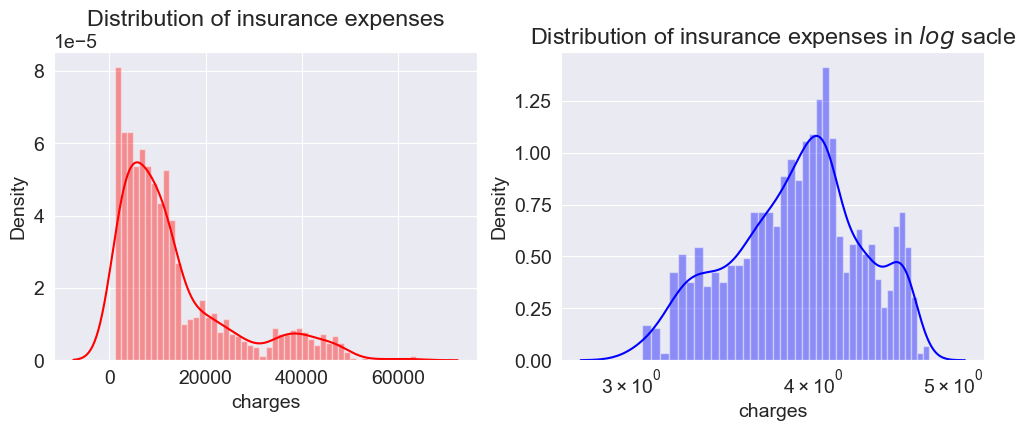

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance expenses')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance expenses in $log$ sacle')
ax.set_xscale('log');


If we look at the left plot the expenses varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.

In [14]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [15]:
# Saving the cleaned data
X.to_csv('clean_data.csv')

### Standard Scalar
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

In [16]:
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [17]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Let us check shape of the training & test set
print(X_train.shape, y_test.shape)

(1070, 6) (268,)


### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

## Linear Regression

In [19]:
linear_reg = Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())])

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print("The Mean Squared Error using Linear Regression :{}".format(linear_reg_mse))
print(('The Root Mean Squared Error using Linear Regression :{}'.format(linear_reg_rmse)))
print(('The r2_score using Linear Regression :{}'.format(linear_reg_r2_score)))

The Mean Squared Error using Linear Regression :33596915.85136147
The Root Mean Squared Error using Linear Regression :5796.2846592762735
The r2_score using Linear Regression :0.7835929767120723


In [20]:
score = []
for i in range(1000):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(r2_score(y_test, y_pred))

In [21]:
np.argmax(score)

367

In [22]:
score[np.argmax(score)]

0.8333095083845212

## Decision Tree

In [23]:
decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))])
decision_tree.fit(X_train, y_train)
# Predicting the model
y_pred1 = decision_tree.predict(X_test)
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print("The Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_mse))
print("The Root Mean Squared Error using Decision Tree Regressor : {}".format(decision_tree_rmse))
print("The r2_score using Decision Tree Regressor : {}".format(decision_tree_r2_score))

The Mean Squared Error using Decision Tree Regressor : 36657265.7031583
The Root Mean Squared Error using Decision Tree Regressor : 4896.51472057015
The r2_score using Decision Tree Regressor : 0.8368489062020883


## Random Forest

In [24]:
random_forest_reg =  Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 25061190.924208168
The Root Mean Squared Error using Random Forest Regressor : 5006.115352666992
The r2_score Error using Random Forest Regressor : 0.8294634134666851


In [25]:
random_forest_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=30, max_depth=4, min_samples_split=5,random_state=42))])
random_forest_reg.fit(X_train, y_train)                        

# Predicting the model
y_pred2 = random_forest_reg.predict(X_test)

# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print("The Mean Squared Error using Random Forest Regressor : {}".format(random_forest_mse))
print("The Root Mean Squared Error using Random Forest Regressor : {}".format(random_forest_rmse))
print("The r2_score Error using Random Forest Regressor : {}".format(random_forest_r2_score))

The Mean Squared Error using Random Forest Regressor : 22141705.30036139
The Root Mean Squared Error using Random Forest Regressor : 4705.497348884748
The r2_score Error using Random Forest Regressor : 0.8493299519017353


## Gradient Boosting

In [26]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 22124902.41742141
The Root Mean Squared Error using Gradient Boosting Regressor : 4703.711557634185
The r2_sccore using Gradient Boosting Regressor : 0.8494442922899942


In [27]:
gradient_boosting_reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor(n_estimators=41, max_depth=3, min_samples_split=4, random_state=42))])

gradient_boosting_reg.fit(X_train, y_train)

# Predicting the model
y_pred3 = gradient_boosting_reg.predict(X_test)

# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print("The Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_mse))
print("The Root Mean Squared Error using Gradient Boosting Regressor : {}".format(gradient_boosting_rmse))
print("The r2_sccore using Gradient Boosting Regressor : {}".format(gradient_boosting_r2_score))

The Mean Squared Error using Gradient Boosting Regressor : 21487058.692785524
The Root Mean Squared Error using Gradient Boosting Regressor : 4635.413540643976
The r2_sccore using Gradient Boosting Regressor : 0.8537846962185253


## KNN

In [28]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

knn.fit(X_train, y_train)

# Predictiong The model
y_pred4 = knn.predict(X_test)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print("The mean squared error using KNN is {}".format(knn_mse))
print("The root mean squared error using KNN is {}".format(knn_rmse))
print("The r2_score using KNN is {}".format(knn_r2_score))

The mean squared error using KNN is 33302165.095577277
The root mean squared error using KNN is 5770.802812051134
The r2_score using KNN is 0.7733851684565107


From the above observation we can say that the performance (RMSE & R-sqaured) of Gradient boosting model is good as compared to other models. So we will save Gradient boosting model for further testing of the data using pickle library.

In [ ]:
pickle.dump(gradient_boosting_reg, open('gradient_boosting_regressor_model.pkl', 'wb'))